# Smoothing particles

In [1]:
# Libraries ----
import sys  # type: ignore
import warnings

import imageio  # type: ignore
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

sys.path.append("../modules")
import plot_clustering as plt_cp  # type: ignore
import plot_smoothing as plt_sp  # type: ignore
import plot_tracking as plt_tp  # type: ignore
import smoothing_particles as sp  # type: ignore
import track_particles as tp  # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option("display.max_columns", None)

## Global variables

In [2]:
input_path = "../input_files"
output_path = "../output_files"
log_path = "../logs"
input_generation_date = "2025-02-18"

ordering = True
video_name = "3n_3m_0f_240214_2"
n_particles = int(video_name[0])
save_figures = True
x_bounds = [0, 1080]
y_bounds = [70, 1840]
x_zoom = [0, 1080]
y_zoom = [0, 1920]

## Load tracked data

In [3]:
df_tracked = pd.read_csv(
    "{}/clustered_{}.csv".format(output_path, video_name), low_memory=False
)
df_tracked.head(n_particles)

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
0,0,0,468.098850,117.478943,463.228764,120.121186,NaN,468.09885,117.478943,NaN,468.09885,117.478943,-1.505623,16004.0,242.117413,90.972940,0.926726,3,NaN,NaN,NaN,NaN,False,False,False
1,1,0,1135.494492,807.028661,1131.088337,800.919165,0.0,1211.00000,734.000000,0.682353,1184.00000,785.000000,1.558524,19155.0,257.751641,100.560129,0.920754,3,NaN,NaN,NaN,NaN,False,False,False
2,2,0,1139.988787,976.742362,1130.893405,973.923111,0.0,1023.00000,916.000000,0.690196,1041.00000,939.000000,-1.286319,14893.0,237.484308,86.564590,0.931201,3,NaN,NaN,NaN,NaN,False,False,False


In [4]:
df_tracked.tail(n_particles)

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
43191,0,43197,1633.437294,109.590516,1632.698765,111.585309,NaN,1633.437294,109.590516,NaN,1633.437294,109.590516,0.674284,11219.0,181.462958,91.985489,0.861999,3,3.0,0.007550,-0.003780,0.000307,False,False,False
43192,1,43197,123.546417,134.914281,137.359400,135.303877,NaN,123.546417,134.914281,NaN,123.546417,134.914281,1.539748,12086.0,217.794868,82.343855,0.925773,3,3.0,0.002204,0.007850,-0.000070,False,False,False
43193,2,43197,1095.323988,980.649075,1087.504912,975.841285,0.0,1006.000000,922.000000,0.698039,1011.000000,961.000000,1.231593,16371.0,260.119287,88.963431,0.939696,3,3.0,-0.003985,0.001832,0.000086,False,False,False


## Swapping mixed IDs

In [5]:
omega_threshold = 20 * np.pi / 180  # Angular velocity per frame (in degrees)
velocity_threshold = 83  # Velocity per frame limited with half average size of particle
print("Thresholds:\n\t- Velocity:", velocity_threshold, "\n\t- Angle:", omega_threshold * 180 / np.pi, "\n")
delta = 400

from importlib import reload
reload(sp)

arg_list = [
    # VIDEO 1
    [0    , 10000, velocity_threshold, omega_threshold, True],
    [10000, 20000, velocity_threshold, omega_threshold, True],
    [20000, 30000, velocity_threshold, omega_threshold, True],
    [30000, 40000, velocity_threshold, omega_threshold, True],
    [40000, 43200, velocity_threshold, omega_threshold, True]#,
    # [50000, 60000, velocity_threshold, omega_threshold, True],
    # [60000, 70000, velocity_threshold, omega_threshold, True],
    # [70000, 80000, velocity_threshold, omega_threshold, True],
    # [80000, 90000, velocity_threshold, omega_threshold, True],
    # [90000, 100000, velocity_threshold, omega_threshold, True],
    # [100000, 108311, velocity_threshold, omega_threshold, True]
]

df_final = sp.smooth_frames(
    df_tracked=df_tracked,
    arg_list=arg_list,
    order=False,
    log_path=log_path,
    log_filename="log_{}".format(video_name),
    verbose=1,
    tqdm_bar=True
)

df_final.head(8)

Thresholds:
	- Velocity: 83 
	- Angle: 20.0 



100%|█████████████████████████| 5/5 [00:30<00:00,  6.14s/it]


Time: 30000 Chunks 2 Allowed time 30000 Permutation [0 1 2]


,allowed_frame,time,smooth_chunk,id,permuted_id,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,corrected_orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
0,True,0,chunk_00000_10000,0,0,468.098850,117.478943,463.228764,120.121186,NaN,468.098850,117.478943,NaN,468.098850,117.478943,-1.505623,-1.505623,16004.0,242.117413,90.972940,0.926726,3,NaN,NaN,NaN,NaN,False,False,False
1,True,0,chunk_00000_10000,1,1,1135.494492,807.028661,1131.088337,800.919165,0.0,1211.000000,734.000000,0.682353,1184.000000,785.000000,1.558524,1.558524,19155.0,257.751641,100.560129,0.920754,3,NaN,NaN,NaN,NaN,False,False,False
2,True,0,chunk_00000_10000,2,2,1139.988787,976.742362,1130.893405,973.923111,0.0,1023.000000,916.000000,0.690196,1041.000000,939.000000,-1.286319,-1.286319,14893.0,237.484308,86.564590,0.931201,3,NaN,NaN,NaN,NaN,False,False,False
3,True,3,chunk_00000_10000,0,0,468.136502,117.460952,463.245766,120.102711,NaN,468.136502,117.460952,NaN,468.136502,117.460952,-1.505623,-1.505623,16004.0,242.117413,90.972940,0.926726,3,3.0,0.012550,-0.005997,0.0,False,False,False
4,True,3,chunk_00000_10000,1,1,1135.332620,807.164417,1130.744017,801.158394,0.0,1211.000000,734.000000,0.682353,1114.500000,787.000000,1.558524,1.558524,19155.0,257.751641,100.560129,0.920754,3,3.0,-0.053957,0.045252,0.0,False,False,False
5,True,3,chunk_00000_10000,2,2,1139.988787,976.742362,1130.893405,973.923111,0.0,1023.000000,916.000000,0.690196,1041.000000,939.000000,-1.286319,-1.286319,14893.0,237.484308,86.564590,0.931201,3,3.0,0.000000,0.000000,0.0,False,False,False
6,True,6,chunk_00000_10000,0,0,468.207010,117.441100,463.336337,120.113441,NaN,468.207010,117.441100,NaN,468.207010,117.441100,-1.505623,-1.505623,16004.0,242.117413,90.972940,0.926726,3,3.0,0.023503,-0.006617,0.0,False,False,False
7,True,6,chunk_00000_10000,1,1,1135.261518,807.286742,1130.647358,801.330887,0.0,1210.000000,734.500000,0.682353,1148.750000,793.000000,1.558524,1.558524,19155.0,257.751641,100.560129,0.920754,3,3.0,-0.023701,0.040775,0.0,False,False,False


In [6]:
df_final.tail(5)

,allowed_frame,time,smooth_chunk,id,permuted_id,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,corrected_orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
43190,True,43194,chunk_40000_43200,2,1,1095.335942,980.643578,1087.513338,975.828459,0.0,1006.000000,922.000000,0.698039,1013.000000,961.000000,1.231336,-1.231336,16357.0,260.222362,88.886788,0.939853,3,3.0,-0.005869,-0.000001,-0.000124,False,False,False
43188,True,43194,chunk_40000_43200,0,2,1633.414645,109.601855,1632.709650,111.643876,NaN,1633.414645,109.601855,NaN,1633.414645,109.601855,0.673363,-0.673363,11212.0,181.495763,91.987157,0.862047,3,3.0,0.011825,0.039807,-0.000525,False,False,False
43192,True,43197,chunk_40000_43200,1,0,123.546417,134.914281,137.359400,135.303877,NaN,123.546417,134.914281,NaN,123.546417,134.914281,1.539748,-1.539748,12086.0,217.794868,82.343855,0.925773,3,3.0,0.002204,0.007850,-0.000070,False,False,False
43193,True,43197,chunk_40000_43200,2,1,1095.323988,980.649075,1087.504912,975.841285,0.0,1006.000000,922.000000,0.698039,1011.000000,961.000000,1.231593,-1.231593,16371.0,260.119287,88.963431,0.939696,3,3.0,-0.003985,0.001832,0.000086,False,False,False
43191,True,43197,chunk_40000_43200,0,2,1633.437294,109.590516,1632.698765,111.585309,NaN,1633.437294,109.590516,NaN,1633.437294,109.590516,0.674284,-0.674284,11219.0,181.462958,91.985489,0.861999,3,3.0,0.007550,-0.003780,0.000307,False,False,False


## Interpolation over not allowed frames

In [7]:
if ordering:
    df_full = df_final.copy().sort_values(["time", "permuted_id"])
    for id_ in range(len(df_full["permuted_id"].unique())):
        mask = df_full.loc[:, "permuted_id"] == df_full["permuted_id"].unique()[id_]
        df_full[mask] = df_full[mask].interpolate(method="linear")

In [8]:
if ordering:
    cols = [
        "id",
        "permuted_id",
        "time",
        "position_x",
        "position_y",
        "weighted_x",
        "weighted_y",
        "darkest_v",
        "darkest_x",
        "darkest_y",
        "lightest_v",
        "lightest_x",
        "lightest_y",
        "orientation",
        "corrected_orientation",
        "area",
        "axis_major",
        "axis_minor",
        "eccentricity",
    ]
    df_temp = df_full[cols]
    df_temp.to_csv(
        "{}/interpolated_{}.csv".format(output_path, video_name), index=False
    )
    df_temp

Thresholds:
	- Velocity: 26.919168499277777 
	- Angle: 4.935054343496324 



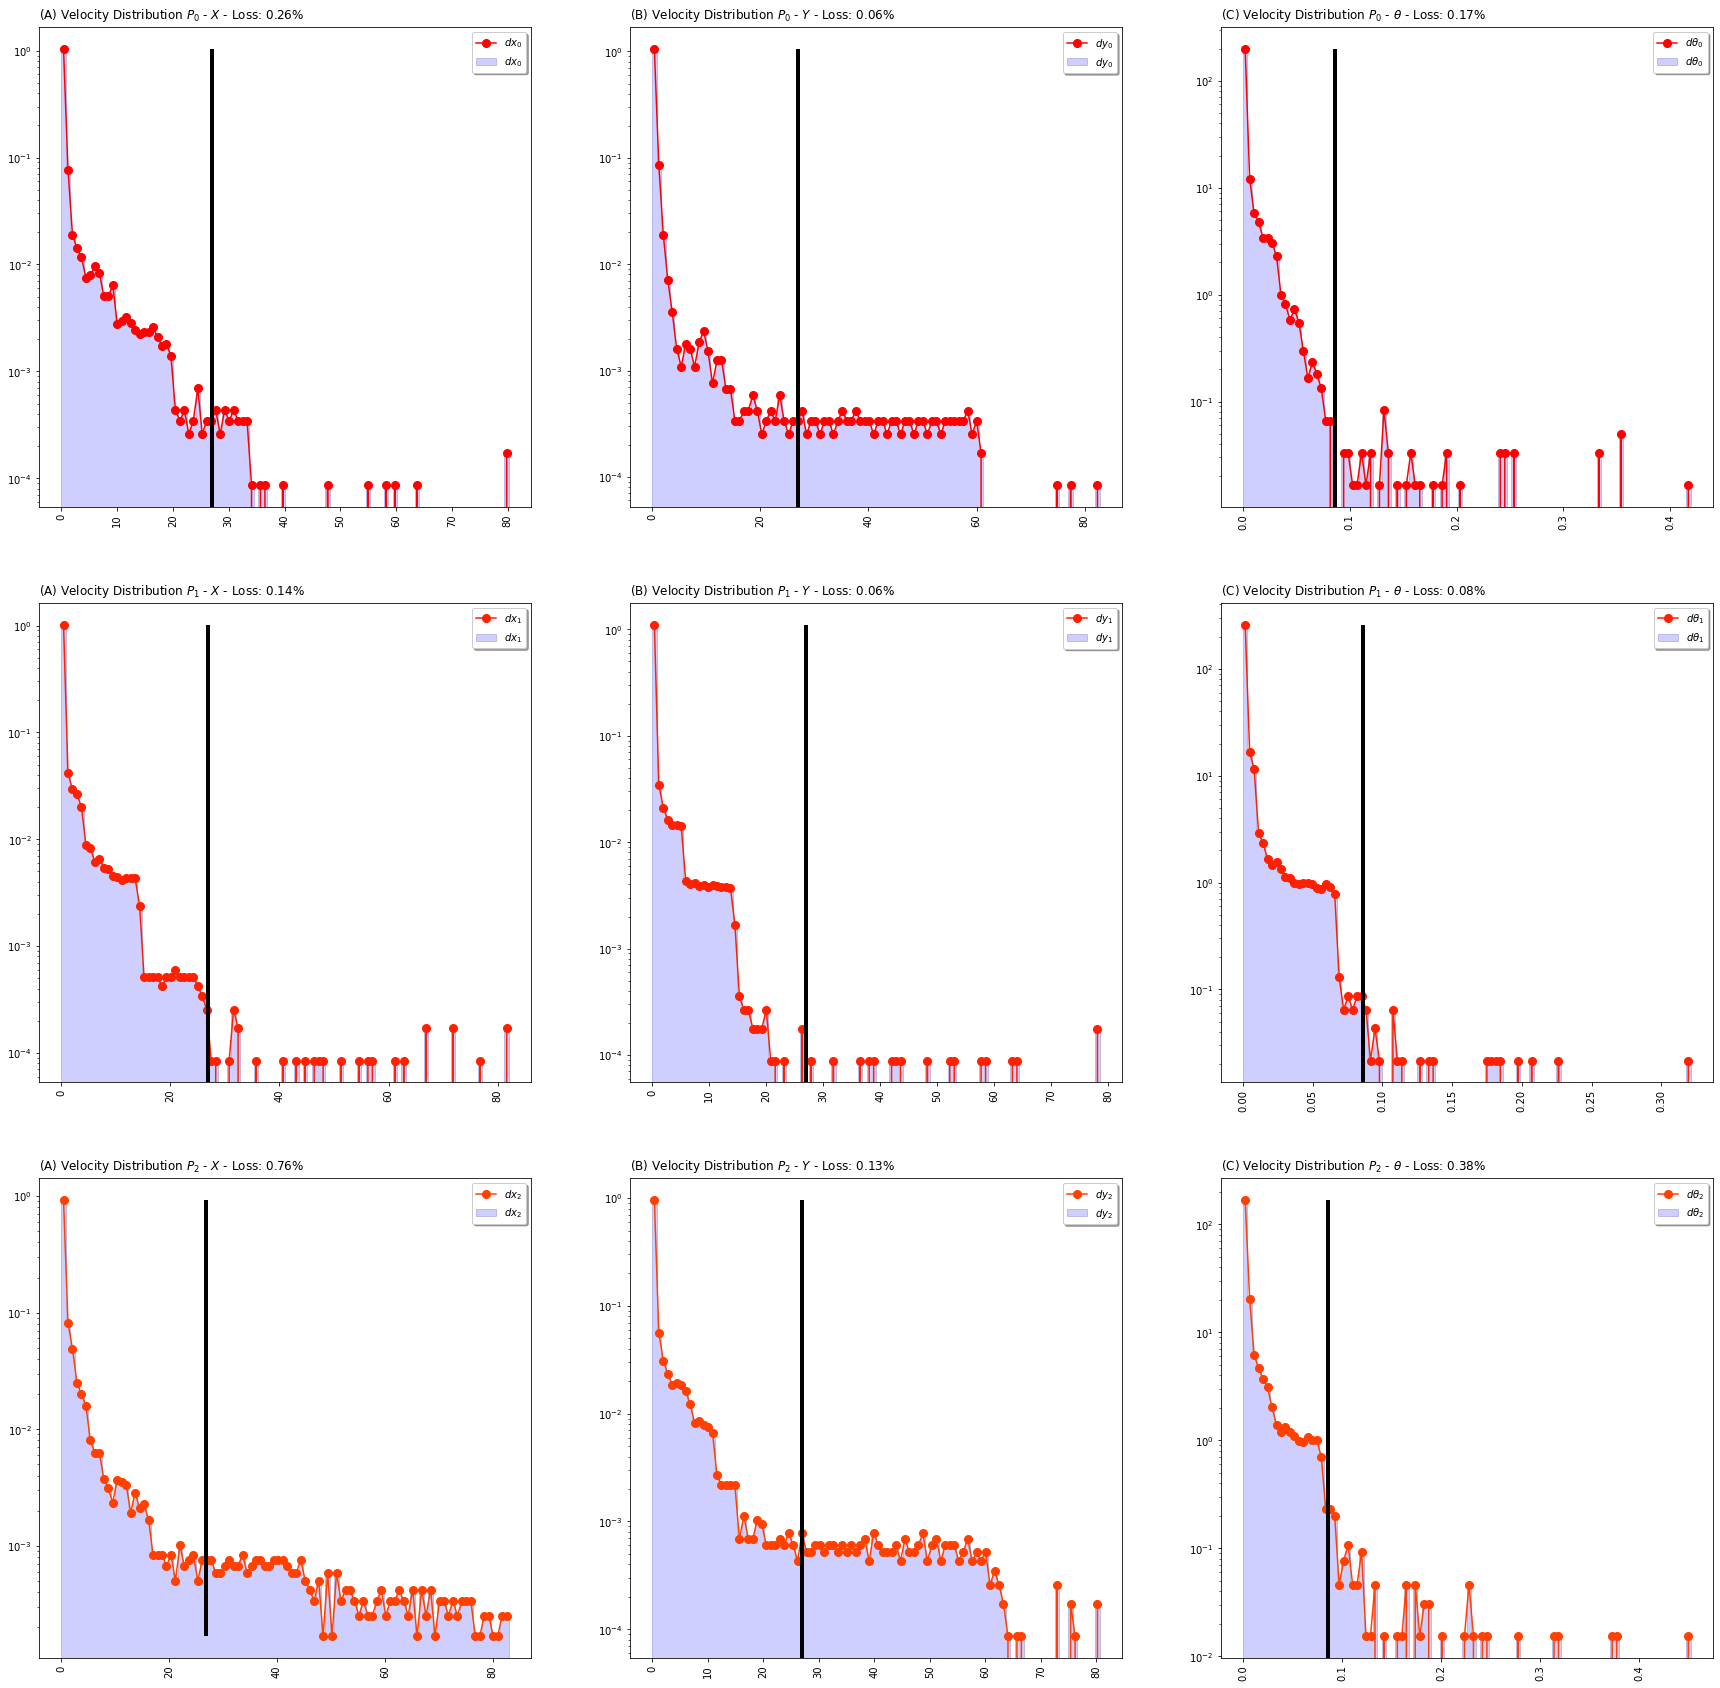

In [9]:
if ordering:
    bins = 100
    width = 10
    fancy_legend = True
    omega_threshold = (
        df_full["velocity_orientation"].abs().quantile(0.9965)
    )  # Angular velocity per frame
    velocity_threshold = (
        df_full["velocity_x"].abs().quantile(0.9901)
    )  # Velocity per frame limited with half average size of particle
    print(
        "Thresholds:\n\t- Velocity:",
        velocity_threshold,
        "\n\t- Angle:",
        omega_threshold * 180 / np.pi,
        "\n",
    )

    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_cp.plot_velocities_distribution(
        df_tracked=df_smooth,
        bins=bins,
        velocity_threshold=velocity_threshold,
        omega_threshold=omega_threshold,
        width=width,
        fancy_legend=fancy_legend,
    )

Original


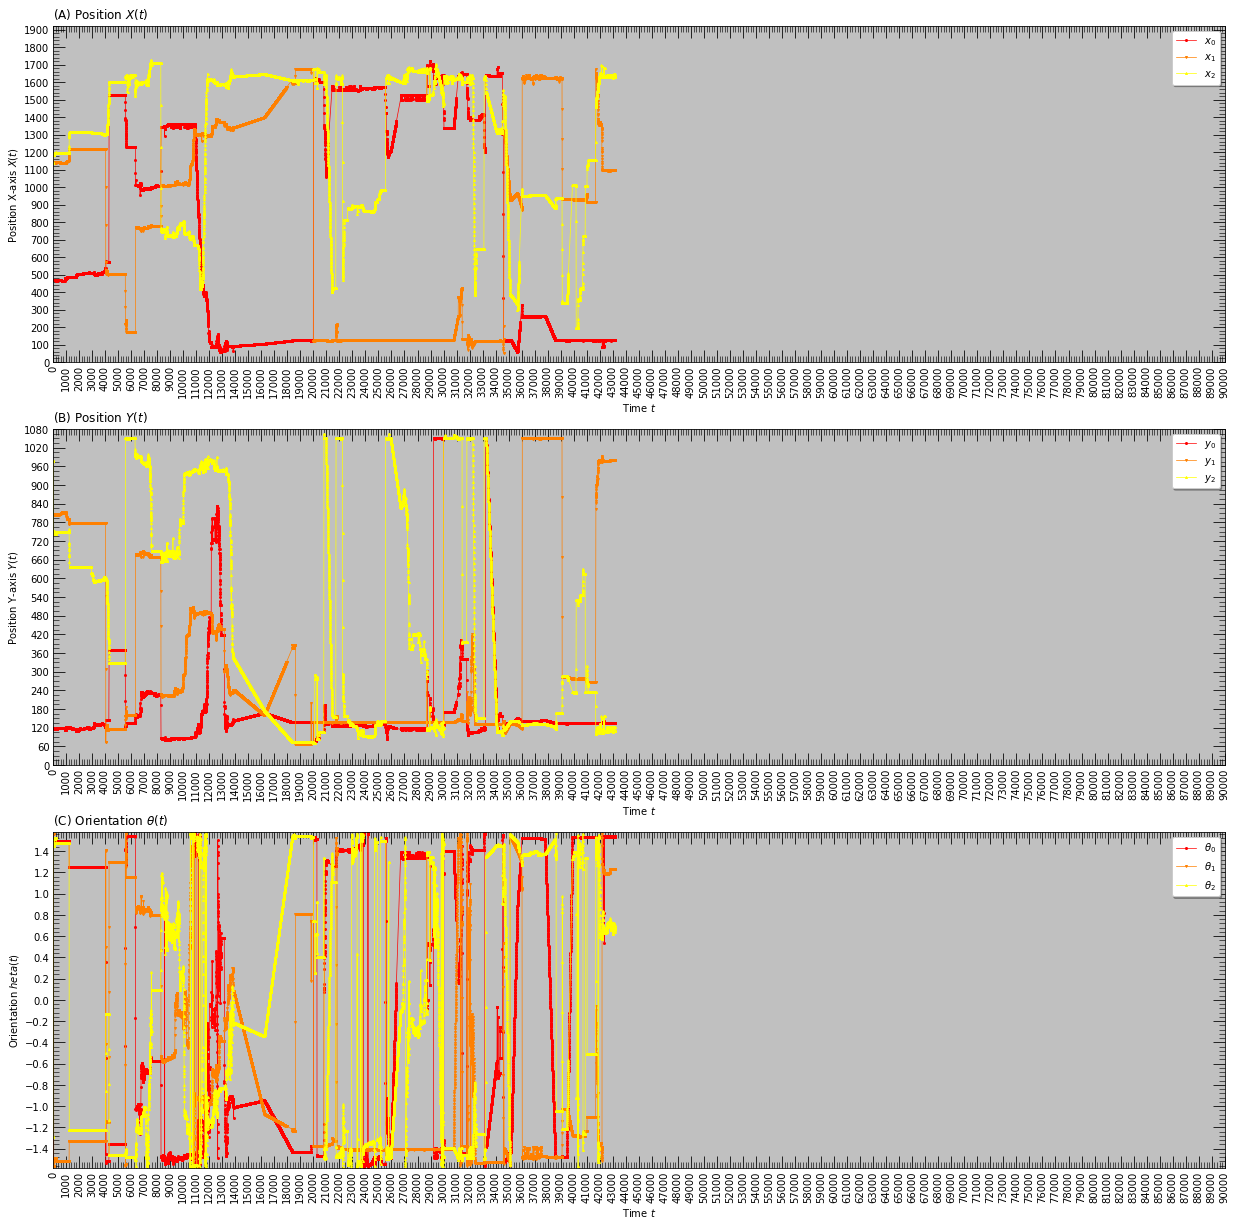

Corrected Orientation


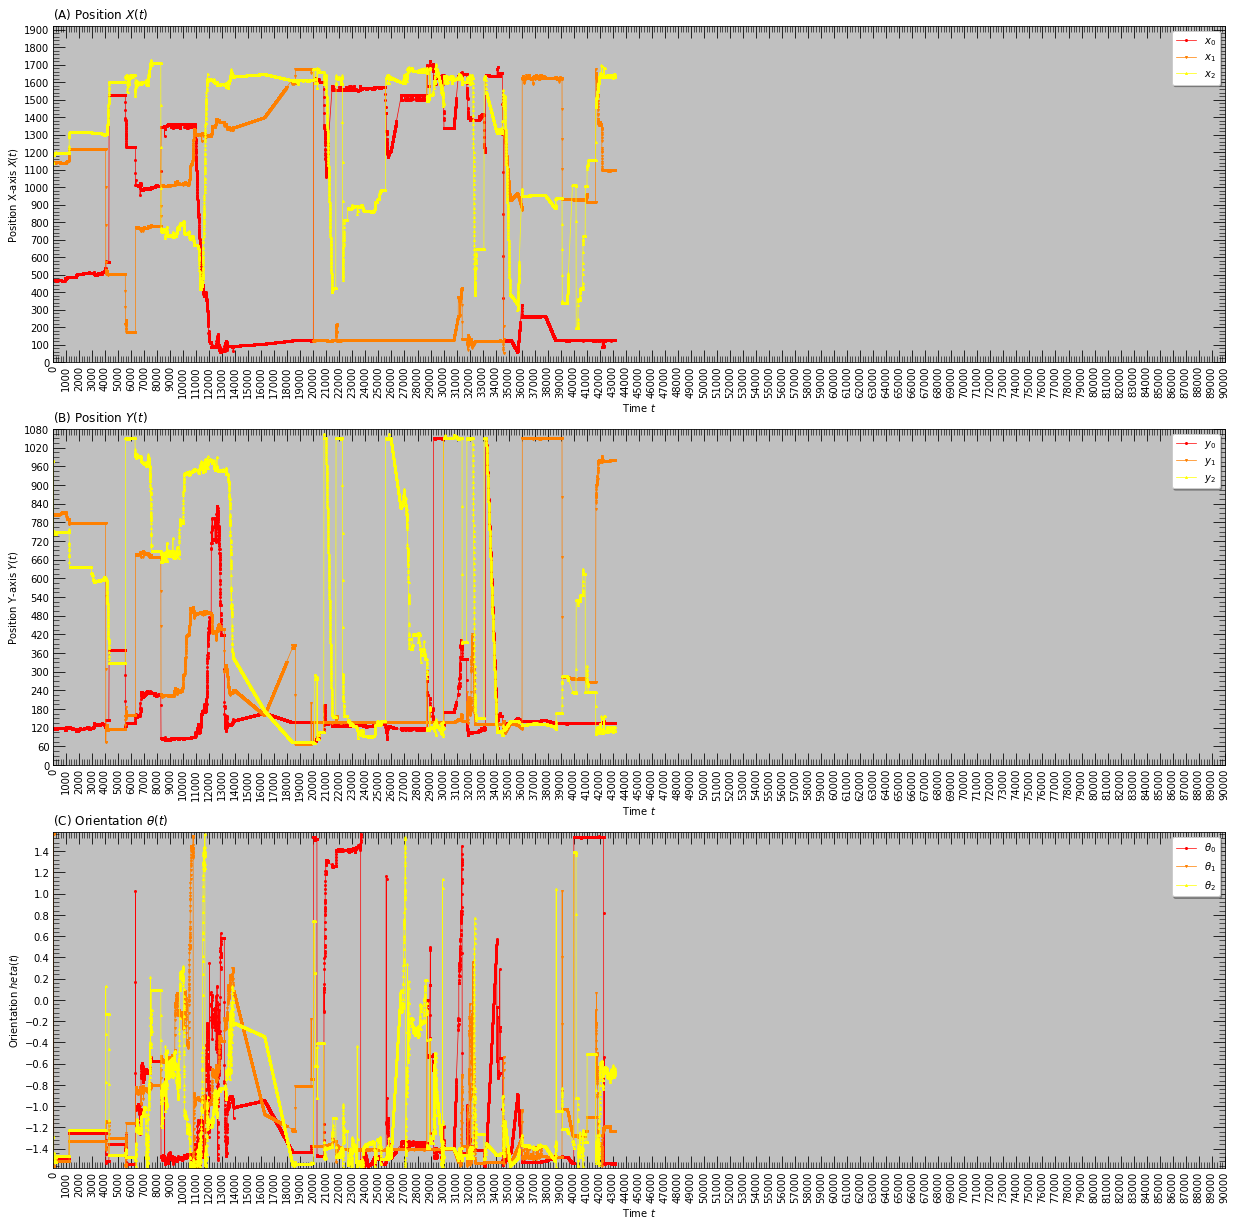

In [10]:
if ordering:
    width = 21
    n_x_breaks = 100
    n_y_breaks = 20
    t0, tf = 0, 90000  # 22200, 24300
    t0_, tf_ = 0, 90000  # 22200, 24300
    t_bounds = [t0_, tf_]
    p_bounds = [[0, 1920], [0, 1080], [-1.58, 1.58]]
    fancy_legend = True

    print("Original")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    velocity_threshold = (
        df_full["velocity_x"].abs().quantile(0.9701)
    )  # Velocity per frame limited with half average size of particle
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[
            (
                (df_smooth["velocity_x"] <= velocity_threshold)
                & (df_smooth["velocity_y"] <= velocity_threshold)
            )
        ],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend,
    )

    print("Corrected Orientation")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[
            (
                (df_smooth["velocity_x"] <= velocity_threshold)
                & (df_smooth["velocity_y"] <= velocity_threshold)
            )
        ],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend,
    )